In [1]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
original1 = """Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in our lives. Hope you too, to enjoy it as my deepest wishes.
Thank your message to show our words to the doctor, as his next contract checking, to all of us.
I got this message to see the approved message. In fact, I have received the message from the professor, to show me, this, a couple of days ago. I am very appreciated the full support of the professor, for our Springer proceedings publication."""

reconstructed1 = """Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in our lives. Hope you too, to enjoy it as my deepest wishes. Thank your message to show our words to the doctor, as his next contract checking, to all of us. I got this message to see the approved message. In fact, I have received the message from the professor, to show me, this, a couple of days ago. I am very appreciated the full support of the professor, for our Springer proceedings publication."""


original2 = """During our final discuss, I told him about the new submission — the one we were waiting since last autumn, but the updates was confusing as it not included the full feedback from reviewer or maybe editor?
Anyway, I believe the team, although bit delay and less communication at recent days, they really tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance and efforts until the Springer link came finally last week, I think.
Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit before he sending again. Because I didn’t see that part final yet, or maybe I missed, I apologize if so.
Overall, let us make sure all are safe and celebrate the outcome with strong coffee and future targets"""


reconstructed2 = """During our final discussion, I told him about the new submission — the one we were waiting since last autumn, but the updates was confusing as it not included the full feedback from reviewer or maybe editor?
Anyway, I believe the team, although bit delay and less communication at recent days, they really tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance and efforts until the Springer link came finally last week, I think. Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit before he sending again. Because I didn’t see that part final yet, or maybe I missed, I apologize if so. Overall, let us make sure all are safe and celebrate the outcome with strong coffee and future targets."""

In [3]:
texts = [original1, reconstructed1, original2, reconstructed2]

tokenized = [simple_preprocess(t) for t in texts]
model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=1, workers=2)

In [4]:
def average_similarity(tokens1, tokens2, model):
    sims = []

    for w1 in tokens1:
        if w1 in model.wv:
            max_sim = max(
                [cosine_similarity([model.wv[w1]], [model.wv[w2]])[0][0]
                 for w2 in tokens2 if w2 in model.wv], default=0)
            sims.append(max_sim)
    return np.mean(sims) if sims else 0

def symmetric_similarity(text1, text2, model):
    tokens1 = simple_preprocess(text1)

    tokens2 = simple_preprocess(text2)
    sim1 = average_similarity(tokens1, tokens2, model)
    sim2 = average_similarity(tokens2, tokens1, model)

    return (sim1 + sim2) / 2

In [5]:
def cosine_similarity_mean_vector(text1, text2, model):
    def get_mean_vector(tokens):
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)


    tokens1 = simple_preprocess(text1)
    tokens2 = simple_preprocess(text2)
    vec1 = get_mean_vector(tokens1)
    vec2 = get_mean_vector(tokens2)
    sim = cosine_similarity([vec1], [vec2])[0][0]
    return sim

In [6]:
def plot_embeddings(text1, text2, model, title="Word Embedding Shift (PCA)"):

    tokens1 = simple_preprocess(text1)
    tokens2 = simple_preprocess(text2)

    words = list(set(tokens1 + tokens2))
    word_vectors = []
    labels = []
    colors = []


    for word in words:
        if word in model.wv:
            word_vectors.append(model.wv[word])
            labels.append(word)
            if word in tokens1 and word in tokens2:
                colors.append('green') 
            elif word in tokens1:
                colors.append('blue')  
            else:
                colors.append('red')    

    # PCA
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(word_vectors)

    plt.figure(figsize=(12, 8))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y, c=colors[i], label=label if colors[i] != 'green' else "", alpha=0.7)
        plt.text(x+0.01, y+0.01, label, fontsize=9)

    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()



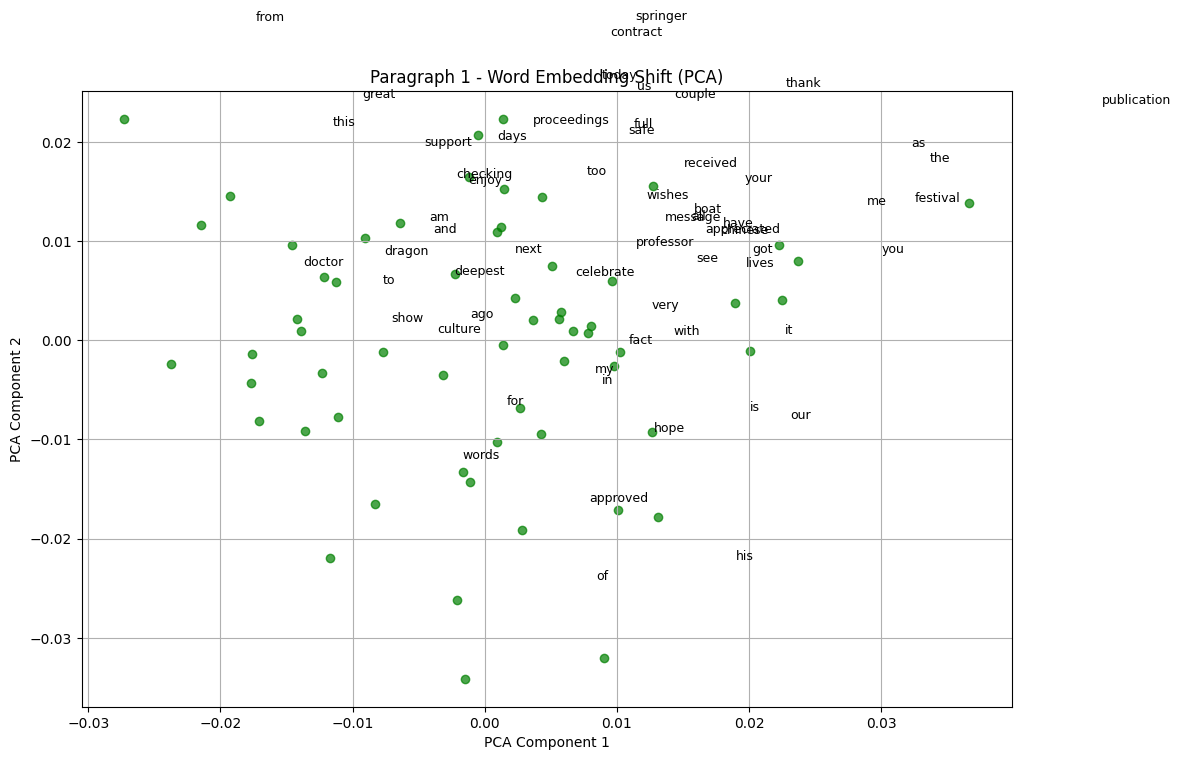

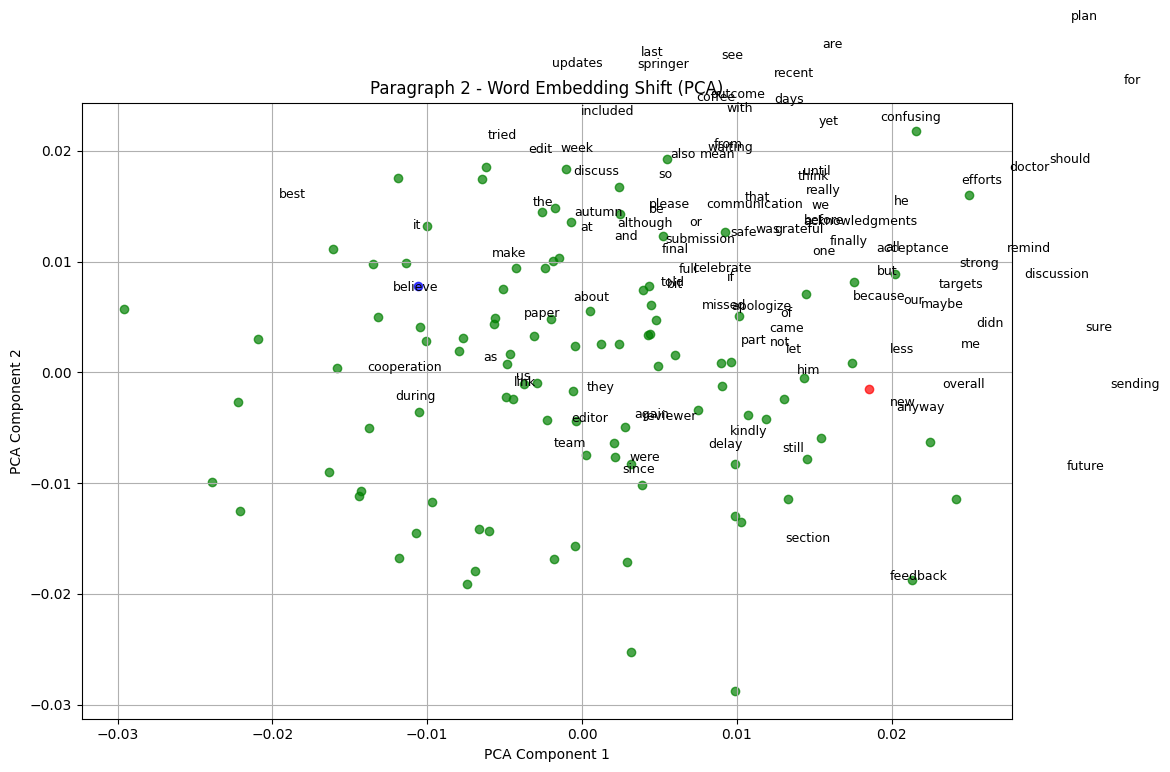

In [7]:
plot_embeddings(original1, reconstructed1, model, title="Paragraph 1 - Word Embedding Shift (PCA)")
plot_embeddings(original2, reconstructed2, model, title="Paragraph 2 - Word Embedding Shift (PCA)")